In [14]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pickle 

## Question 1

In [15]:
def run(episodes,is_training=True, render=False):
    env = gym.make('Taxi-v3',render_mode='human' if render else None)

    if(is_training):
        q = np.zeros((env.observation_space.n,env.action_space.n)) # create a q array of 64x4 grid
    else:
        f = open('taxi_q1.pkl','rb')
        q = pickle.load(f)
        f.close()

    learning_rate_a = 0.6 #alpha or learning rate
    discount_factor_g = 0.9 # gamma or discount factor

    epsilon = 0.8 # 1= 100% random action 0 is 
    epsilon_decay_rate = 1 # epsilon decay rate. 1/0.0001 = 10,000
    rng = np.random.default_rng() # random number generator
    
    rewards_per_episode = np.zeros(episodes)

    for i in range(episodes):
        state = env.reset()[0] 
        terminated = False # Tru when fall in hole or reached goal
        truncated = False # True when actions > 200


        while (not terminated and not truncated):
            if is_training and rng.random() <epsilon:
                action = env.action_space.sample() #actions: 0-left 1-down 2-right 3-up
            else:
                action = np.argmax(q[state,:]) # Returns the position of max q value in the row

            # Executing the action decided and returns the new state and parameters like reward, terminated, truncated
            new_state,reward,terminated,truncated,_ = env.step(action) 

            q[state,action] = q[state,action] + learning_rate_a * ( 
                reward + discount_factor_g * np.max(q[new_state,:]) - q[state,action]
            )
            state = new_state


        epsilon = max(epsilon - epsilon_decay_rate, 0) # Updating epsilon and ensuring it stays positive

        if (epsilon==0):
            learning_rate_a = 0.0001

        rewards_per_episode[i] += reward

    env.close()
    if not is_training:
        print(rewards_per_episode)
    sum_rewards = np.zeros(episodes)
    for t in range(episodes):
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
    plt.plot(sum_rewards)
    plt.xlabel("Episodes")
    plt.ylabel("Sum of Rewards (Last 100 Episodes)")
    plt.title("Training Progress of Taxi-v3 Agent")
    plt.savefig('taxi_q1.png')

    if is_training:
        f = open("taxi_q1.pkl","wb")
        pickle.dump(q,f)
        f.close()

[20.]


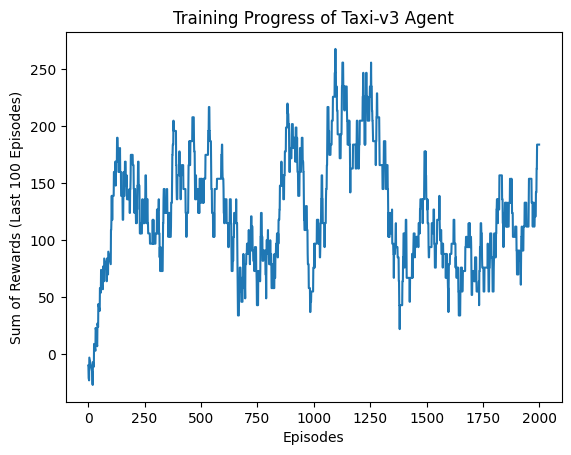

In [16]:
if __name__ == '__main__':
    run(2000)
    run(1, is_training=False, render=True)

## Question 2

In [17]:
def run(episodes,is_training=True, render=False):
    env = gym.make('Taxi-v3',render_mode='human' if render else None)

    if(is_training):
        q = np.zeros((env.observation_space.n,env.action_space.n)) # create a q array of 64x4 grid
    else:
        f = open('taxi-q2.pkl','rb')
        q = pickle.load(f)
        f.close()

    learning_rate_a = 0.9 #alpha or learning rate
    discount_factor_g = 0.8 # gamma or discount factor

    epsilon = 1 # 1= 100% random action 0 is 
    epsilon_decay_rate = 0.01 # epsilon decay rate. 1/0.0001 = 10,000
    rng = np.random.default_rng() # random number generator
    
    rewards_per_episode = np.zeros(episodes)

    for i in range(episodes):
        state = env.reset()[0] 
        terminated = False # Tru when fall in hole or reached goal
        truncated = False # True when actions > 200


        while (not terminated and not truncated):
            if is_training and rng.random() <epsilon:
                action = env.action_space.sample() #actions: 0-left 1-down 2-right 3-up
            else:
                action = np.argmax(q[state,:]) # Returns the position of max q value in the row

            # Executing the action decided and returns the new state and parameters like reward, terminated, truncated
            new_state,reward,terminated,truncated,_ = env.step(action) 

            q[state,action] = q[state,action] + learning_rate_a * ( 
                reward + discount_factor_g * np.max(q[new_state,:]) - q[state,action]
            )
            state = new_state


        epsilon = max(epsilon - epsilon_decay_rate, 0) # Updating epsilon and ensuring it stays positive

        if (epsilon==0):
            learning_rate_a = 0.0001

        rewards_per_episode[i] += reward

    env.close()
    if not is_training:
        print(rewards_per_episode)
    sum_rewards = np.zeros(episodes)
    for t in range(episodes):
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
    plt.plot(sum_rewards)
    plt.xlabel("Episodes")
    plt.ylabel("Sum of Rewards (Last 100 Episodes)")
    plt.title("Training Progress of Taxi-v3 Agent")
    plt.savefig('taxi-q2.png')

    if is_training:
        f = open("taxi-q2.pkl","wb")
        pickle.dump(q,f)
        f.close()

[20.]


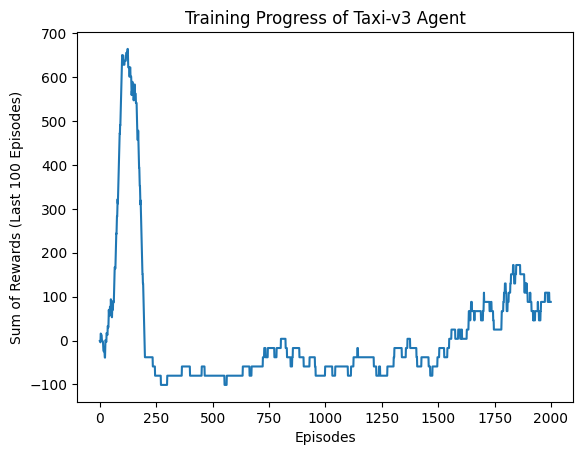

In [18]:
if __name__ == '__main__':
    run(2000)
    run(1, is_training=False, render=True)

## Question 3

In [19]:
def run(episodes,is_training=True, render=False):
    env = gym.make('Taxi-v3',render_mode='human' if render else None)

    if is_training:
        q = np.zeros((env.observation_space.n, env.action_space.n))  # Initialize Q-table
        visit_count = np.zeros((env.observation_space.n, env.action_space.n))  # Track visits per state-action pair
    else:
        with open('taxi-q3.pkl', 'rb') as f:
            q = pickle.load(f)
        visit_count = None  # No need to track visits during testing

    learning_rate_a = 0.9  # Learning rate (alpha)
    discount_factor_g = 0.8  # Discount factor (gamma)

    epsilon = 1.0  # Initial exploration probability
    epsilon_decay_rate = 0.01  # Decay rate for epsilon

    rng = np.random.default_rng()  # Random number generator

    rewards_per_episode = np.zeros(episodes)

    for i in range(episodes):
        state = env.reset()[0]
        terminated = False
        truncated = False

        if is_training:
            visit_count.fill(0)  # Reset visit counts at the start of each episode

        while not terminated and not truncated:
            if is_training:
                # Select action: Either explore (if visits < 10) or exploit
                valid_actions = [a for a in range(env.action_space.n) if visit_count[state, a] < 10]
                if valid_actions and rng.random() < epsilon:
                    action = rng.choice(valid_actions)  # Explore valid actions
                else:
                    action = np.argmax(q[state, :])  # Exploit best known action
                visit_count[state, action] += 1  # Update visit count
            else:
                action = np.argmax(q[state, :])  # Always exploit during testing

            # Execute action and observe new state and reward
            new_state, reward, terminated, truncated, _ = env.step(action)

            # Q-learning update rule
            q[state, action] = q[state, action] + learning_rate_a * (
                reward + discount_factor_g * np.max(q[new_state, :]) - q[state, action]
            )

            state = new_state

        # Update epsilon (decrease randomness over time)
        epsilon = max(epsilon - epsilon_decay_rate, 0)
        if epsilon == 0:
            learning_rate_a = 0.0001  # Reduce learning rate when fully exploiting

        rewards_per_episode[i] += reward

    env.close()

    if not is_training:
        print(rewards_per_episode)

    # Plot training progress
    sum_rewards = np.zeros(episodes)
    for t in range(episodes):
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t - 100):(t + 1)])

    plt.plot(sum_rewards)
    plt.xlabel("Episodes")
    plt.ylabel("Sum of Rewards (Last 100 Episodes)")
    plt.title("Training Progress of Taxi-v3 Agent")
    plt.savefig('taxi-q3.png')

    # Save trained Q-table
    if is_training:
        with open("taxi-q3.pkl", "wb") as f:
            pickle.dump(q, f)

[20.]


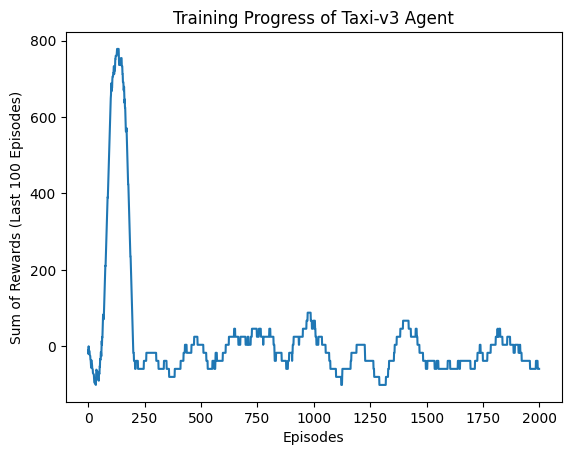

In [20]:
if __name__ == '__main__':
    run(2000)  # Train
    run(1, is_training=False, render=True)  # Test